In [17]:
%load_ext autoreload
%autoreload 2

# Pagel's lambda for growth rates
from src.ihmp import get_diffs, pagels_dataframe

# Global variables
GG_TREE = "./greengenes/data/gg_13_5_otus_99_annotated.tree"
TOP_N = 100

names = ["ibd", "moms", "t2d"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Distill into iHMP-agnostic function:
diffs = {name: get_diffs(name, top_n=TOP_N) for name in names}

In [19]:
# Compute lambda values for each iHMP dataset:

for name in names:
    pls, tree = pagels_dataframe(diffs[name], GG_TREE)
    pls.to_csv(f"./results/{name}_pls_top{TOP_N}.tsv", sep="\t")
    tree.write(format=1, outfile=f"./results/{name}_tree_top{TOP_N}.nwk")

100%|██████████| 69/69 [00:07<00:00,  8.96it/s]


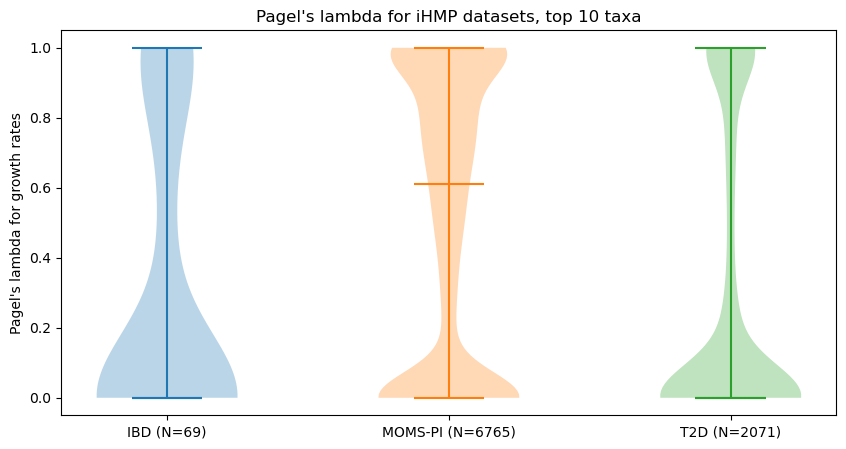

In [ ]:
# Violin plot

import matplotlib.pyplot as plt
import pandas as pd

data = []
for name in names:
    pls = pd.read_table(f"./results/{name}_pls_top{TOP_N}.tsv")
    pls["dataset"] = name.upper()
    data.append(pls)

pls = pd.concat(data)

# Plot
plt.figure(figsize=(10, 5))
datasets = pls["dataset"].unique()
for i, dataset in enumerate(data):
    plt.violinplot(
        dataset["lambda"].dropna().values,
        showmedians=True,
        positions=[i + 1],
    )

# print(len(ibd_pls["lambda"].dropna().values)) # 69
# print(len(moms_pls["lambda"].dropna().values)) # 6765
# print(len(t2d_pls["lambda"].dropna().values)) # 2071

plt.xticks(range(1, 4), ["IBD (N=69)", "MOMS-PI (N=6765)", "T2D (N=2071)"])
plt.ylabel("Pagel's lambda for growth rates")
plt.title(f"Pagel's lambda for iHMP datasets, top {TOP_N} taxa")
plt.savefig(f"./results/pls_top{TOP_N}.png", dpi=300)
plt.show()

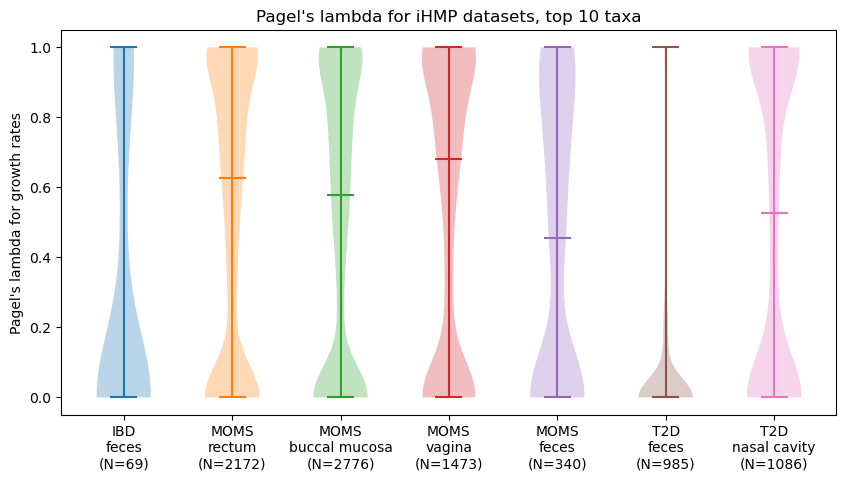

In [ ]:
# Same thing but grouped by body site

# Only need the plotting part, though:
plt.figure(figsize=(10, 5))
datasets = pls["dataset"].unique()
labels = []
position = 1
for dataset in data:
    for site in dataset["site"].unique():
        name = dataset["dataset"].unique()[0]
        lambdas = dataset[dataset["site"] == site]["lambda"].dropna().values
        if len(lambdas) > 4: # Drop uselessly small samples
            labels.append(f"{name}\n{site}\n(N={len(lambdas)})")
            plt.violinplot(lambdas, showmedians=True, positions=[position])
            position += 1

plt.xticks(range(1, position), labels)
plt.ylabel("Pagel's lambda for growth rates")
plt.title(f"Pagel's lambda for iHMP datasets, top {TOP_N} taxa")
plt.savefig(f"./results/lambda_by_site_top{TOP_N}.png", dpi=300)
plt.show()